In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/faf35_provi_2012_final.csv')

df.head()

,Unnamed: 0,fr_orig,dms_origst,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,tmiles_2012,value_log
0,0,801,22,1,0,4,4,0,33,2,-7.013116,-8.086548,-1.760261
1,1,0,4,34,806,0,1,3,24,3,-3.661264,-2.766927,-2.189256
2,2,801,50,40,0,2,2,0,4,2,-4.518992,-4.028987,-6.812445
3,3,0,2,9,0,0,1,0,30,1,-9.210340,-7.853217,-7.130899
4,4,0,54,6,802,0,1,1,36,3,-4.193061,-3.262460,-2.670754


In [0]:
df.columns

Index(['Unnamed: 0', 'fr_orig', 'dms_origst', 'dms_destst', 'fr_dest',
       'fr_inmode', 'dms_mode', 'fr_outmode', 'sctg2', 'trade_type',
       'tons_2012', 'tmiles_2012', 'value_log'],
      dtype='object')

In [0]:
df =df.drop('Unnamed: 0', axis=1)

In [0]:
df.isnull().sum()

fr_orig        0
dms_origst     0
dms_destst     0
fr_dest        0
fr_inmode      0
dms_mode       0
fr_outmode     0
sctg2          0
trade_type     0
tons_2012      0
tmiles_2012    0
value_log      0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373990 entries, 0 to 373989
Data columns (total 12 columns):
fr_orig        373990 non-null int64
dms_origst     373990 non-null int64
dms_destst     373990 non-null int64
fr_dest        373990 non-null int64
fr_inmode      373990 non-null int64
dms_mode       373990 non-null int64
fr_outmode     373990 non-null int64
sctg2          373990 non-null int64
trade_type     373990 non-null int64
tons_2012      373990 non-null float64
tmiles_2012    373990 non-null float64
value_log      373990 non-null float64
dtypes: float64(3), int64(9)
memory usage: 34.2 MB


X and Y Variables

In [0]:
X= df.drop('value_log', axis=1)
y= df['value_log']

In [0]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
import statsmodels.api as sm

Xc=sm.add_constant(X)
lin_reg=sm.OLS(y_train,X_train)
result=lin_reg.fit()
print(result.summary())

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


                                 OLS Regression Results                                
Dep. Variable:              value_log   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                          8.238e+04
Date:                Sun, 12 Jan 2020   Prob (F-statistic):                        0.00
Time:                        16:21:30   Log-Likelihood:                     -5.3117e+05
No. Observations:              261793   AIC:                                  1.062e+06
Df Residuals:                  261782   BIC:                                  1.062e+06
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [0]:
  from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
VIF_Housing=pd.DataFrame({'vif': vif}, index=X_train.columns)
VIF_Housing.sort_values(by='vif')

,vif
dms_mode,2.972327
sctg2,4.043235
dms_destst,4.590273
dms_origst,4.775533
fr_inmode,7.796544
fr_outmode,9.511565
fr_orig,21.720889
tons_2012,21.993992
tmiles_2012,22.507941
fr_dest,49.496051


In [0]:
X_vif=X_train.drop('trade_type', axis=1)

In [0]:
vif = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
VIF_Housing=pd.DataFrame({'vif': vif}, index=X_vif.columns)
VIF_Housing.sort_values(by='vif')

,vif
dms_mode,2.532377
sctg2,3.488224
dms_destst,3.751995
dms_origst,3.838285
fr_inmode,7.746094
fr_orig,8.723407
fr_outmode,9.305292
fr_dest,9.974952
tons_2012,21.922312
tmiles_2012,22.485952


In [0]:
X_vif1=X_vif.drop(['tmiles_2012', 'tons_2012'], axis=1)

In [0]:
vif = [variance_inflation_factor(X_vif1.values, i) for i in range(X_vif1.shape[1])]
VIF_Housing=pd.DataFrame({'vif': vif}, index=X_vif1.columns)
VIF_Housing.sort_values(by='vif')

,vif
dms_mode,2.506669
sctg2,3.325327
dms_destst,3.697821
dms_origst,3.774906
fr_inmode,7.633266
fr_orig,8.716065
fr_outmode,9.126059
fr_dest,9.926010


In [0]:
VIF_Housing.index

Index(['fr_orig', 'dms_origst', 'dms_destst', 'fr_dest', 'fr_inmode',
       'dms_mode', 'fr_outmode', 'sctg2'],
      dtype='object')

In [0]:
X1 = df[['fr_orig', 'dms_origst', 'dms_destst', 'fr_dest', 'fr_inmode',
       'dms_mode', 'fr_outmode', 'sctg2']]


ML _ Algorithm

In [0]:
X= df.drop(['value_log', 'dms_origst'], axis=1)
y= df['value_log']

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.linear_model import LinearRegression

# create instance
model = LinearRegression() 


In [0]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)

lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)


print("R2 of Train",r2_score(y_train,y_pred_train))
print("RMSE of Train",np.sqrt(mean_squared_error(y_train,y_pred_train)))

R2 of Train 0.5663130776163057
RMSE of Train 1.83583408574931


In [0]:
model = []
model.append(('LR', LinearRegression()))

names = []
scores = []

for name, model in model:
    
    kfold = KFold(n_splits=10, random_state=42) 
    score = cross_val_score(model, X, y, cv=kfold).mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
pd.DataFrame(kf_cross_val)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


,Name,Score
0,LR,0.566324


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373990 entries, 0 to 373989
Data columns (total 12 columns):
fr_orig        373990 non-null int64
dms_origst     373990 non-null int64
dms_destst     373990 non-null int64
fr_dest        373990 non-null int64
fr_inmode      373990 non-null int64
dms_mode       373990 non-null int64
fr_outmode     373990 non-null int64
sctg2          373990 non-null int64
trade_type     373990 non-null int64
tons_2012      373990 non-null float64
tmiles_2012    373990 non-null float64
value_log      373990 non-null float64
dtypes: float64(3), int64(9)
memory usage: 34.2 MB


In [0]:

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [0]:
models = []
models.append(('KNN', KNeighborsRegressor()))
models.append(('DT', DecisionTreeRegressor(random_state=42)))
models.append(('ET', ExtraTreeRegressor(random_state=42)))
models.append(('BayRidge', BayesianRidge()))
models.append(('RF', RandomForestRegressor(random_state=42)))
models.append(('Lasso', Lasso(random_state=42)))
models.append(('Ridge', Ridge(random_state=42)))

In [0]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score
from sklearn.metrics import precision_score, classification_report, cohen_kappa_score

In [0]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

Regressor _ Algorithm

In [0]:
names = []
scores = []

scores1 = []
scores2 = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
    
    scores1.append(model.score(X_train,y_train))
    scores2.append(model.score(X_test,y_test))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuray Score': scores, 'Train score':scores1, 'Test score':scores2})
pd.DataFrame(tr_split)

,Name,Accuray Score,Train score,Test score
0,KNN,0.806910,0.876445,0.806910
1,DT,0.635231,1.000000,0.635231
2,ET,0.595866,1.000000,0.595866
3,BayRidge,0.566480,0.566313,0.566480
4,RF,0.815342,0.974099,0.815342
5,Lasso,0.443786,0.445813,0.443786
6,Ridge,0.566378,0.566224,0.566378


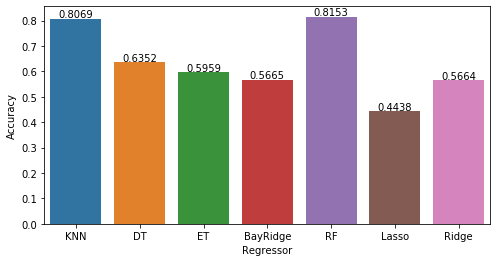

In [0]:
plt.figure(figsize=(8,4))
axis = sns.barplot(x = 'Name', y = 'Accuray Score', data = tr_split)
axis.set(xlabel='Regressor', ylabel='Accuracy')
 
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()


Cross_validation

In [0]:
names = []
scores = []

for name, model in models:
    
    kfold = KFold(n_splits=10, random_state=42, shuffle=True  ) 
    score = cross_val_score(model, X, y, cv=kfold).mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores, 'Train score':scores1, 'Test score':scores2})
pd.DataFrame(kf_cross_val)

,Name,Score,Train score,Test score
0,KNN,0.832327,0.885693,0.823173
1,DT,0.792933,1.000000,0.788419
2,BayRidge,0.566332,0.566313,0.566480
3,RF,0.888621,0.984087,0.886440
4,Lasso,0.531999,0.532055,0.530880
5,Ridge,0.566273,0.566224,0.566378


Grid_search

In [0]:
# params = { 'n_neighbors':  [5,10,15]   , 'weights': ['uniform','distance'], 
#           'metric': ['minkowski','euclidean','manhattan'], 'scoring' : ['r2_score']}
# knn= KNeighborsRegressor()

In [0]:
# grid= GridSearchCV(knn,
#     params,
#     n_jobs=None,
#     iid='warn',
#     refit=True,
#     cv=10,
#     verbose=0,
#     pre_dispatch='2*n_jobs',
#     error_score='raise-deprecating',
#     return_train_score=True,  )

# grid.fit(X,y)

In [0]:
# print('best_score:',grid.best_score_)
# print('best_param:',grid.best_params_)
# print('best_estimator:',grid.best_estimator_)

Bagging

In [0]:
from sklearn.ensemble import BaggingRegressor

In [0]:
kfold = KFold(n_splits=10,  random_state=42, shuffle=True )
knn = KNeighborsRegressor()
model = BaggingRegressor(base_estimator=knn, n_estimators=5, random_state=42)
results = cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8317027863366434


In [0]:
model = BaggingRegressor(base_estimator=knn, n_estimators=5, random_state=42)
model.fit(X_train, y_train)
print(); print(model)


BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=None, verbose=0,
                 warm_start=False)


In [0]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

In [0]:

print(); print('ensemble.BaggingRegressor(): ')
print(); print("Accuracy:",r2_score(expected_y, predicted_y))
print(); print("RMSE:",np.sqrt(mean_squared_error(expected_y, predicted_y)))
print(); print("Train Score:",model.score(X_train,y_train))
print(); print("Test Score:",model.score(X_test,y_test))


ensemble.BaggingRegressor(): 

Accuracy: 0.8769601640713739

0.9819204280758373

0.9781163577026717

0.8769601640713739


Standard Scaler

In [0]:
cols=X.select_dtypes(include='float64').columns
cols

Index(['tons_2012', 'tmiles_2012'], dtype='object')

In [0]:
X_scale =X
X_scale.head()

,fr_orig,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,tmiles_2012
0,801,1,0,4,4,0,33,2,-7.013116,-8.086548
1,0,34,806,0,1,3,24,3,-3.661264,-2.766927
2,801,40,0,2,2,0,4,2,-4.518992,-4.028987
3,0,9,0,0,1,0,30,1,-9.210340,-7.853217
4,0,6,802,0,1,1,36,3,-4.193061,-3.262460


In [0]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()


for i in cols:
  X_array =np.array(X[i]).reshape(-1,1)
  X_scale[i]= scaler.fit_transform(X_array)

In [0]:
X_scale.head()

,fr_orig,dms_destst,fr_dest,fr_inmode,dms_mode,fr_outmode,sctg2,trade_type,tons_2012,tmiles_2012
0,801,1,0,4,4,0,33,2,-1.117254,-1.379358
1,0,34,806,0,1,3,24,3,0.024453,0.371023
2,801,40,0,2,2,0,4,2,-0.267706,-0.044248
3,0,9,0,0,1,0,30,1,-1.865672,-1.302582
4,0,6,802,0,1,1,36,3,-0.156688,0.207972


PCA

In [0]:
X_train,X_test,y_train,y_test= train_test_split(X_scale, y, test_size=0.3, random_state=42)

In [0]:
from sklearn.decomposition import PCA

pca=PCA()
X_train =pca.fit_transform (X_train)
X_test =pca.transform(X_test)

In [0]:
names = []
scores = []

scores1 = []
scores2 = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(r2_score(y_test, y_pred))
    
    scores1.append(model.score(X_train,y_train))
    scores2.append(model.score(X_test,y_test))
    
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Accuray Score': scores, 'Train score':scores1, 'Test score':scores2})
pd.DataFrame(tr_split)

,Name,Accuray Score,Train score,Test score
0,KNN,0.806910,0.876445,0.806910
1,DT,0.634795,1.000000,0.634795
2,BayRidge,0.566480,0.566313,0.566480
3,RF,0.815392,0.974126,0.815392
4,Lasso,0.443786,0.445813,0.443786
5,Ridge,0.566378,0.566224,0.566378


Stacking

In [0]:
# ! pip install vecstack

In [0]:
from vecstack import stacking
from mlxtend.regressor import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [0]:
models = [
           KNeighborsRegressor(n_neighbors=5,n_jobs=-1 ),
           DecisionTreeRegressor(random_state=42, max_depth=3  ),
           ExtraTreesRegressor( n_jobs=-1,random_state=42 ),
           BaggingRegressor(base_estimator=knn, n_estimators=5, random_state=42)
   ]

In [0]:
S_train, S_test = stacking(models,
                           X_train, y_train, X_test,
                           regression=True,
                           mode='oof_pred_bag',
                           needs_proba=False,
                           save_dir=None,
                           metric= r2_score,
                           n_folds=4,
                           stratified=False,
                           shuffle=True,
                           random_state=42,
                           verbose=2  )

task:         [regression]
metric:       [r2_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [KNeighborsRegressor]
    fold  0:  [0.78888225]
    fold  1:  [0.79370214]
    fold  2:  [0.79110755]
    fold  3:  [0.79160422]
    ----
    MEAN:     [0.79132404] + [0.00171341]
    FULL:     [0.79133059]

model  1:     [DecisionTreeRegressor]
    fold  0:  [0.51395153]
    fold  1:  [0.51768087]
    fold  2:  [0.51452011]
    fold  3:  [0.51311591]
    ----
    MEAN:     [0.51481710] + [0.00172718]
    FULL:     [0.51483020]

model  2:     [ExtraTreesRegressor]
    fold  0:  [0.80447806]
    fold  1:  [0.80805705]
    fold  2:  [0.80835795]
    fold  3:  [0.80804652]
    ----
    MEAN:     [0.80723489] + [0.00159657]
    FULL:     [0.80723887]

model  3:     [BaggingRegressor]
    fold  0:  [0.78762225]
    fold  1:  [0.79247692]
    fold  2:  [0.79073537]
    fold  3:  [0.79018678]
    ----
    MEAN:     [0.79025533] + [0.00173952]
    FULL:     [0.79026175]

